# Tools and Methods of Data Analysis
## Session 5 - Part 2

Niels Hoppe <<niels.hoppe.extern@srh.de>>

In [1]:
import math
from scipy import stats
import seaborn as sns

## 1) Flaws

A company knows from experience that 10% of its products have flaws and must be classified as "seconds".
    
1. Among six randomly selected products, how likely is it that only one is a second?
2. Among six randomly selected products, what is the probability that at least two are seconds?
3. If the products are examined one by one, what is the probability that at most five must be selected to find four that are not seconds?

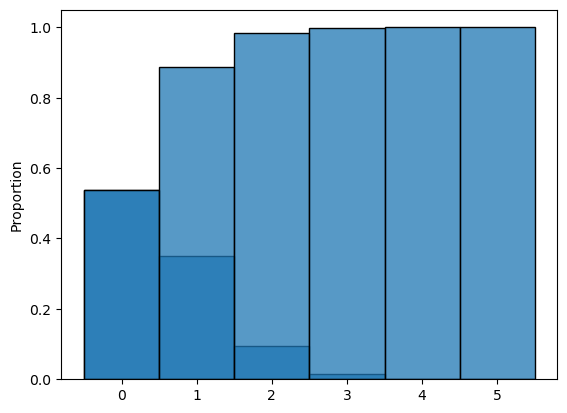

In [2]:
sample = stats.binom.rvs(6, 0.1, size=10000)
sns.histplot(data=sample, stat='proportion', discrete=True)
sns.histplot(data=sample, stat='proportion', discrete=True, cumulative=True)
None # <-- suppress output in Jupyter notebook

## 1) Flaws (cont.)

In [3]:
# probability mass function
stats.binom.pmf(1, 6, 0.1)

0.35429399999999994

In [4]:
# cumulative density function: 1 or 2 seconds
1 - stats.binom.cdf(1, 6, 0.1)

0.11426500000000006

In [5]:
# cumulative density function
stats.binom.cdf(1, 5, 0.1)

0.91854

## 2) FDA Report on Pesticides in Food

Every quarter, the U.S. Food and Drug Administration (FDA) produces a report called the Total Diet Study.
The FDA’s report covers a variety of food items, each of which is analyzed for potentially harmful chemical compounds.
A recent Total Diet Study reported that no pesticides at all were found in 60% of the domestically produced food samples (FDA Pesticide Program: Residue Monitoring, 2001).
Consider a random sample of 100 food items analyzed for the presence of pesticides.

1. Compute the expected value and the standard deviation for the random variable X, the number of food items found that showed no trace of pesticide.
2. Based on a sample of 100 food items, is it likely you would observe less than half without any traces of pesticide! Calculate the probability.
3. Repeat (b) using a normal distribution approximation.

## 2) FDA Report on Pesticides in Food (cont.)

In [6]:
# expected value:
100 * 0.6

60.0

In [7]:
# standard deviation
std = math.sqrt(100 * 0.6 * 0.4)
std

4.898979485566356

In [8]:
stats.binom.cdf(49, 100, 0.6)

0.016761686503161465

In [9]:
stats.norm.cdf(49.5, 60, std)

0.016044366989115627

## 3) Power Supply Units

An electronics manufacturer claims that at most 5% of its power supply units need service during the warranty period.
To investigate this claim, technicians at a testing laboratory purchase 20 units and subject each one to accelerated testing to simulate use during the warranty period.

What is the expected value?

Under the condition that the claim of the manufacturer is true, determine the probabilities of observing x = 0, x = 1, ..., x = 6 units among the 20 sampled that need repair. 

In [10]:
ex = 20 * 0.05
ex

1.0

In [11]:
[stats.binom.pmf(x, 20, 0.05) for x in range(0, 7)]

[0.3584859224085419,
 0.37735360253530753,
 0.18867680126765404,
 0.05958214776873281,
 0.013327585685111266,
 0.002244646010124003,
 0.000295348159226843]

## 4) Material Anomalies

Let X be the number of material anomalies occurring in a particular region of an aircraft gas-turbine disk. The article “Methodology for Probabilistic Life Prediction of Multiple Anomaly Materials” (Amer. Inst. of Aeronautics and Astronautics J., 2006: 787–793) proposes a Poisson distribution for X. Suppose that expected value $E(X) = 4$.

1. Compute both $P(X \leq 4$) and $P(X < 4)$.
2. Compute $P(4 \leq X \leq 8)$.
3. Compute $P(X \geq 8)$.
4. What is the probability that the number of anomalies exceeds its mean value by no more than one standard deviation?

## 4) Material Anomalies (cont.)

In [12]:
stats.poisson.cdf(4, 4)

0.6288369351798734

In [13]:
stats.poisson.cdf(3, 4)

0.43347012036670896

In [14]:
stats.poisson.cdf(8, 4) - stats.poisson.cdf(3, 4)

0.5451664451453069

In [15]:
1 - stats.poisson.cdf(7, 4)

0.05113361579284725

In [16]:
mean = 4 # = E(X)
std = math.sqrt(mean) # 2
stats.poisson.cdf(mean + std, mean) - stats.poisson.cdf(mean - std - 1, mean)

0.7977478271537555

## 5) Airline fatalities

US airlines average about 1.2 fatalities per month (Statistical Abstract of the United States: 2006). Assume the probability distribution for X, the number of fatalities per month, can be approximated by a Poisson probability distribution.

1. What is the probability that no fatalities will occur during any given month?
2. What is the probability that one fatality will occur during a month?
3. Find E(X) and the standard deviation of X.

## 5) Airline fatalities (cont.)

In [17]:
stats.poisson.pmf(0, 1.2)

0.30119421191220214

In [18]:
stats.poisson.pmf(1, 1.2)

0.36143305429464256

In [19]:
ex = 1.2
std = math.sqrt(ex)
std

1.0954451150103321

## 6) Vinyl chloride emissions

The U.S. Environmental Protection Agency (EPA) limits the amount of vinyl chloride in plant air emissions to no more than 10 parts per million. Suppose the mean emission of vinyl chloride for a particular plant is 4 parts per million. Assume that the number of parts per million of vinyl chloride in air samples X, follows a Poisson probability distribution.

1. What is the standard deviation of X for the plant?
2. Is it likely that a sample of air from the plant would yield a value of X that would exceed the EPA limit? Explain.
3. Discuss conditions that would make the Poisson assumption plausible.

In [20]:
ex = 4
std = math.sqrt(ex)
std

2.0

In [21]:
1 - stats.poisson.cdf(mu=4, k=10)

0.0028397661205137315

## 7) Concentration of Influent

The article “Reliability of Domestic-Waste Biofilm Reactors” (J. of Envir. Engr., 1995: 785–790) suggests that substrate concentration (mg/cm³) of influent to a reactor is normally distributed with μ = 0.30 and σ = 0.06.
    
1. What is the probability that the concentration exceeds 0.25?
2. What is the probability that the concentration is at most 0.20?
3. How would you characterize the largest 5% of all concentration values?

In [22]:
1 - stats.norm.cdf(loc=.3, scale=.06, x=.25)

0.797671619036357

In [23]:
stats.norm.cdf(loc=.3, scale=.06, x=.2)

0.04779035227281475

In [24]:
stats.norm.ppf(loc=.3, scale=.06, q=.95)

0.3986912176170883

## 8) Steel

The article “Monte Carlo Simulation—Tool for Better Understanding of LRFD” (J. of Structural Engr., 1993: 1586–1599) suggests that yield strength (ksi) for A36 grade steel is normally distributed with $\mu = 43$ and $\sigma = 4.5$.

1. What is the probability that yield strength is at most 40? Greater than 50?
2. What yield strength value separates the strongest 75% from the others?
3. Find the symmetrical interval around mean that contains 95% of the cases.

## 8) Steel (cont.)

In [25]:
stats.norm.cdf(loc=43, scale=4.5, x=40)

0.2524925375469229

In [26]:
1 - stats.norm.cdf(loc=43, scale=4.5, x=50)

0.05990690710277191

In [27]:
stats.norm.ppf(loc=43, scale=4.5, q=.25)

39.96479612411763

In [28]:
lower = stats.norm.ppf(loc=43, scale=4.5, q=.025)
upper = stats.norm.ppf(loc=43, scale=4.5, q=.975)
(lower, upper)

(34.180162069569754, 51.81983793043024)

## 9) Resistors

The distribution of resistance for resistors of a certain type is known to be normal, with 10% of all resistors having a resistance exceeding 10.256 ohms and 5% having a resistance smaller than 9.671 ohms. What are the mean value and standard deviation of the resistance distribution? 

$$\mu + z \cdot \sigma = x$$

In [29]:
x1, x2 = 9.671, 10.256
z1, z2 = stats.norm.ppf(q=.05), stats.norm.ppf(q=.9)
z1, z2

(-1.6448536269514729, 1.2815515655446004)

## Resistors (cont.)

Find two equations for $\mu$ and $\sigma$:

$$\mu = x - z \cdot \sigma$$
$$I: \mu = x_1 - z_1 \cdot \sigma$$
$$II: \mu = x_2 - z_2 \cdot \sigma$$
$$I = II: x_1 - z_1 \cdot \sigma = x_2 - z_2 \cdot \sigma$$

## Resistors (cont.)

Solve for $\sigma$:
$$ x_1 - x_2 = z_1 \cdot \sigma - z_2 \cdot \sigma$$
$$ x_1 - x_2 = (z_1 - z_2) \cdot \sigma$$
$$\sigma = \frac{x_1 - x_2}{z_1 - z_2}$$

In [30]:
sigma = (x1 - x2) / (z1 - z2)
mu = x1 - z1 * sigma
sigma, mu

(0.199903964597953, 9.99981276121092)

## 10) Rockwell Hardness

The Rockwell hardness of a metal is determined by impressing a hardened point into the surface of the metal and then measuring the depth of penetration of the point. Suppose the Rockwell hardness of a particular alloy is normally distributed with mean 70 and standard deviation 3. (Rockwell hardness is measured on a continuous scale.)

1. If a specimen is acceptable only if its hardness is between 67 and 75, what is the probability that a randomly chosen specimen has an acceptable hardness?
2. If the acceptable range of hardness is (70 - c, 70 + c), for what value of c would 95% of all specimens have acceptable hardness?
3. If the acceptable range is as in part (a) and the hardness of each of ten randomly selected specimens is independently determined, what is the expected number of acceptable specimens among the ten?

## 10) Rockwell Hardness (cont.)

In [31]:
p = stats.norm.cdf(loc=70, scale=3, x=75) - stats.norm.cdf(loc=70, scale=3, x=67)
p

0.7935543937957282

In [32]:
c = 70 - stats.norm.ppf(loc=70, scale=3, q=.025)
c = stats.norm.ppf(loc=70, scale=3, q=.975) - 70
c

5.8798919536201595

In [33]:
round(10 * p)

8